In [17]:
import os

In [18]:
!wget 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
!unzip cats_and_dogs_filtered.zip

PATH ='cats_and_dogs_filtered'
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

--2022-08-01 08:21:07--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.164.144, 142.250.188.48, 172.217.1.208, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.164.144|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip.1’

cats_and_dogs_filte 100%[===================>]  65.43M   350MB/s    in 0.2s    

2022-08-01 08:21:08 (350 MB/s) - ‘cats_and_dogs_filtered.zip.1’ saved [68606236/68606236]

Archive:  cats_and_dogs_filtered.zip
replace cats_and_dogs_filtered/vectorize.py? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: cats_and_dogs_filtered/vectorize.py  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2127.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2126.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2125.jpg  
  inflating: ca

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir, # If in RAM we pass X and y (.flow() only)
        # All images will be resized to 160x160
        target_size=(150, 150),
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=16,
        class_mode='binary')

# Till now no data loaded, to load we need next or loop -> htbos 3la el folder bs for nw 

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [20]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [21]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 17, 17, 128)     

In [22]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['accuracy'])

In [23]:
history = model.fit(
      train_generator,
      epochs=25,
      validation_data=validation_generator)

Epoch 1/25
63/63 [==============================] - 10s 142ms/step - loss: 0.6909 - accuracy: 0.5440 - val_loss: 0.6817 - val_accuracy: 0.5010
Epoch 2/25
63/63 [==============================] - 9s 139ms/step - loss: 0.6677 - accuracy: 0.6030 - val_loss: 0.6515 - val_accuracy: 0.5950
Epoch 3/25
63/63 [==============================] - 9s 140ms/step - loss: 0.6371 - accuracy: 0.6470 - val_loss: 0.6162 - val_accuracy: 0.6760
Epoch 4/25
63/63 [==============================] - 9s 140ms/step - loss: 0.5970 - accuracy: 0.6755 - val_loss: 0.6243 - val_accuracy: 0.6270
Epoch 5/25
63/63 [==============================] - 9s 136ms/step - loss: 0.5679 - accuracy: 0.7045 - val_loss: 0.5881 - val_accuracy: 0.7080
Epoch 6/25
63/63 [==============================] - 9s 137ms/step - loss: 0.5363 - accuracy: 0.7285 - val_loss: 0.5754 - val_accuracy: 0.7000
Epoch 7/25
63/63 [==============================] - 9s 137ms/step - loss: 0.5151 - accuracy: 0.7395 - val_loss: 0.5628 - val_accuracy: 0.7160
Epoch

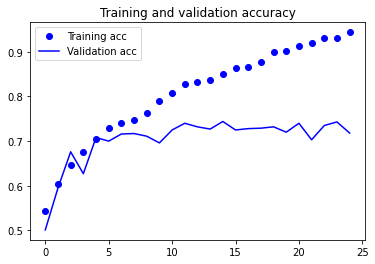

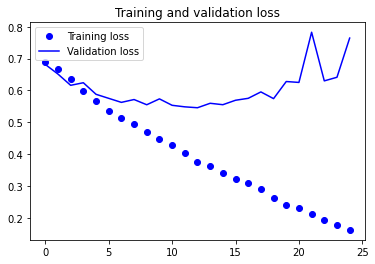

In [24]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()